<a href="https://colab.research.google.com/github/sumitsontakke/deep_learning/blob/main/ANN/end_to_end/base_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import TopKCategoricalAccuracy

from sklearn.model_selection import train_test_split

In [2]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape, X_train.dtype, y_train.dtype)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)

169001437/169001437 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 0us/step
X_train shape: (50000, 32, 32, 3) y_train shape: (50000, 1) uint8 int64
X_test shape: (10000, 32, 32, 3) y_test shape: (10000, 1)


In [3]:
print(X_train[0][0][0], y_train[0:10].flatten(), np.unique(y_train))

[255 255 255] [19 29  0 11  1 86 90 28 23 31] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [4]:
# Visualize first 10 images
# plt.figure(figsize=(3,15))
for i in range(10):
  plt.subplot(2, 10, i+1)
  plt.imshow(X_train[i])
  plt.title(f"Label: {y_train[i][-1]}", fontsize=8)
  plt.axis("off")
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

Label Format | Loss Function
--- | ---
One-hot encoded | categorical_crossentropy
Integer encoded (0‚Äì99) | sparse_categorical_crossentropy

For large number of classes (100 in this case), it will be memory efficient to keep labels and integers and use
```python
loss='sparse_categorical_crossentropy'
```


In [5]:
splitds = train_test_split(X_train, y_train, test_size=0.3,random_state=42)

In [6]:
splitds[0].shape, splitds[1].shape, splitds[2].shape, splitds[3].shape

((35000, 32, 32, 3), (15000, 32, 32, 3), (35000, 1), (15000, 1))

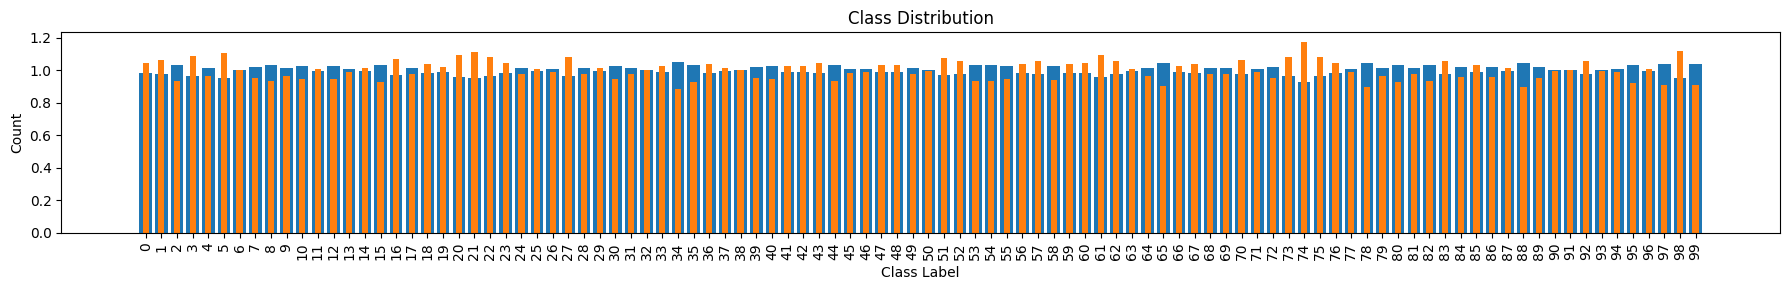

In [7]:
y_training_counts = np.bincount(splitds[2].flatten())
ytrain_pct = y_training_counts / y_training_counts.sum() * 100
y_val_counts = np.bincount(splitds[3].flatten())
yval_pct = y_val_counts / y_val_counts.sum() * 100
y_labels = list(range(100))

plt.figure(figsize=(18,3))
plt.bar(x=y_labels, height=ytrain_pct, width=0.8)
plt.bar(x=y_labels, height=yval_pct, width=0.4)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(y_labels, rotation=90)
plt.tight_layout()
plt.show()

In [8]:
splitdss = train_test_split(X_train, y_train, test_size=0.3,random_state=42, stratify=y_train)
splitdss[0].shape, splitdss[1].shape, splitdss[2].shape, splitdss[3].shape

((35000, 32, 32, 3), (15000, 32, 32, 3), (35000, 1), (15000, 1))

In [9]:
x_labels = list(range(100))
ytrain_count = np.bincount(splitdss[2].ravel())
ytrain_count

array([350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350,
       350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350,
       350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350,
       350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350,
       350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350,
       350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350,
       350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350,
       350, 350, 350, 350, 350, 350, 350, 350, 350])

In [10]:
np.bincount(y_train.flatten())

array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500])

---

## Model

Decision Point | Guideline
--- | ---
üî¢ Number of hidden layers | 2‚Äì4 layers for starting ANN model
üí° Neurons per layer | Start with 512 ‚Üí 256 ‚Üí 128 pattern (powers of 2)
üßÇ Add BatchNorm? | Yes, especially after Dense+ReLU
üíß Dropout? | Yes, e.g., Dropout(0.3‚Äì0.5) to avoid overfitting
üß† Activation functions | ReLU works well; softmax for final
üèÅ Final layer | Dense(100, activation='softmax')

In [11]:
def build_model(learning_rate=0.01):
  model = Sequential()
  model.add(Flatten(input_shape=(32,32,3)))
  for neurons, dr in [(512, 0.3), (256, 0.3), (128, 0.3)]:
    model.add(Dense(neurons, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dr))
  model.add(Dense(100, activation="softmax"))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss="sparse_categorical_crossentropy", metrics=['accuracy', TopKCategoricalAccuracy(k=5)])

  return model

base_model = build_model()
base_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ flatten (Flatten)               ‚îÇ (None, 3072)           ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ (None, 512)            ‚îÇ     1,573,376 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization             ‚îÇ (None, 512)            ‚îÇ         2,048 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 512)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                 ‚îÇ (None, 256)            ‚îÇ       131,328 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_1           ‚îÇ (None, 256)            ‚îÇ         1,024 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout)             ‚îÇ (None, 256)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                 ‚îÇ (None, 128)            ‚îÇ        32,896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_2           ‚îÇ (None, 128)            ‚îÇ           512 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_2 (Dropout)             ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_3 (Dense)                 ‚îÇ (None, 100)           

 Total params: 1,754,084 (6.69 MB)

 Trainable params: 1,752,292 (6.68 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [12]:
ann_trained = base_model.fit(X_train, y_train, epochs=40, batch_size=200, validation_split=0.3, verbose=1)

Epoch 1/40
175/175 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 10ms/step - accuracy: 0.0496 - loss: 4.4470 - top_k_categorical_accuracy: 0.0576 - val_accuracy: 0.1015 - val_loss: 3.8860 - val_top_k_categorical_accuracy: 0.0738
Epoch 2/40
175/175 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 5ms/step - accuracy: 0.1101 - loss: 3.8098 - top_k_categorical_accuracy: 0.0496 - val_accuracy: 0.1147 - val_loss: 3.7981 - val_top_k_categorical_accuracy: 0.0104
Epoch 3/40
175/175 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 7ms/step - accuracy: 0.1316 - loss: 3.6804 - top_k_categorical_accuracy: 0.0446 - val_accuracy: 0.1017 - val_loss: 3.9724 - val_top_k_categorical_accuracy: 0.0261
Epoch 4/40
175/175 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step - accuracy: 0.1415 - loss: 3.6284 - top_k_categorical_accuracy: 0.0480 - val_accuracy: 0.1483 - val_loss: 3.6123 - val_top_k_categorical_accuracy: 0.0673
Epoch 5/40
175

In [13]:
# Evalaute base_model
base_model.evaluate(X_test, y_test)

313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 4ms/step - accuracy: 0.2145 - loss: 3.4704 - top_k_categorical_accuracy: 0.0370


[3.4660558700561523, 0.21610000729560852, 0.03689999878406525]

In [14]:
base_model.save("cifar10_base_ann.keras", overwrite=True)

In [19]:
ann_trained.history.keys()

dict_keys(['accuracy', 'loss', 'top_k_categorical_accuracy', 'val_accuracy', 'val_loss', 'val_top_k_categorical_accuracy'])

In [23]:
str(ann_trained.epoch)

'[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]'

In [33]:
ann_metric_df = pd.DataFrame({
    "epochs": ann_trained.epoch,
    "accuracy": ann_trained.history["accuracy"],
    "loss": ann_trained.history["loss"],
    "val_accuracy": ann_trained.history["val_accuracy"],
    "val_loss": ann_trained.history["val_loss"],
    "top_k_categorical_accuracy": ann_trained.history["top_k_categorical_accuracy"],
    })

ann_metric_df

epochs  accuracy      loss  val_accuracy  val_loss  \
0        0  0.067486  4.174543      0.101467  3.886038   
1        1  0.114486  3.786544      0.114733  3.798116   
2        2  0.131914  3.682947      0.101667  3.972421   
3        3  0.144000  3.618383      0.148267  3.612283   
4        4  0.152400  3.559607      0.139333  3.704959   
5        5  0.161086  3.519577      0.171800  3.545086   
6        6  0.169200  3.492760      0.157800  3.639315   
7        7  0.170600  3.460587      0.173667  3.564185   
8        8  0.177314  3.430671      0.188667  3.456487   
9        9  0.179314  3.413088      0.161933  3.623834   
10      10  0.179743  3.396102      0.180067  3.586614   
11      11  0.185857  3.381317      0.126133  4.040924   
12      12  0.186686  3.376674      0.157733  3.712767   
13      13  0.187600  3.364936      0.190667  3.650300   
14      14  0.192029  3.341712      0.195600  3.685474   
15      15  0.193971  3.323372      0.202000  3.610326   
16      16  0.195714  3.317989      0.207267  3.599369   
17      17  0.199629  3.307319      0.204467  3.741332   
18      18  0.200286  3.294308      0.204667  3.792362   
19      19  0.201171  3.292906      0.201667  3.835570   
20      20  0.203686  3.276382      0.209067  3.754724   
21      21  0.204000  3.267988      0.208067  3.778627   
22      22  0.209429  3.255832      0.205400  3.844843   
23      23  0.207343  3.251909      0.211467  3.789625   
24      24  0.207829  3.241538      0.214000  3.752003   
25      25  0.208686  3.243090      0.220067  3.711568   
26      26  0.210286  3.235327      0.213667  3.745932   
27      27  0.211543  3.230097      0.219133  3.735385   
28      28  0.214171  3.216146      0.225000  3.703514   
29      29  0.217429  3.201732      0.221467  3.781117   
30      30  0.218486  3.193647      0.219533  3.722046   
31      31  0.218143  3.195526      0.225533  3.771141   
32      32  0.222057  3.185490      0.170800  4.080591   
33      33  0.220171  3.177121      0.210667  3.775515   
34      34  0.221971  3.171548      0.224867  3.739968   
35      35  0.222686  3.169960      0.217800  3.793355   
36      36  0.223914  3.165979      0.218733  3.704935   
37      37  0.223371  3.151035      0.217000  3.755572   
38      38  0.223314  3.164813      0.213467  3.779579   
39      39  0.225800  3.154498      0.212400  3.761226   

    top_k_categorical_accuracy  
0                     0.059400  
1                     0.051229  
2                     0.048714  
3                     0.048343  
4                     0.048171  
5                     0.047143  
6                     0.047771  
7                     0.048686  
8                     0.048743  
9                     0.047771  
10                    0.045229  
11                    0.047971  
12                    0.047171  
13                    0.045743  
14                    0.046429  
15                    0.049371  
16                    0.048086  
17                    0.047257  
18                    0.046171  
19                    0.047600  
20                    0.049800  
21                    0.045343  
22                    0.048143  
23                    0.045257  
24                    0.046714  
25                    0.049457  
26                    0.047000  
27                    0.044857  
28                    0.046829  
29                    0.047257  
30                    0.047343  
31                    0.046743  
32                    0.047571  
33                    0.046429  
34                    0.046171  
35                    0.045086  
36                    0.046429  
37                    0.047943  
38                    0.047000  
39                    0.048943

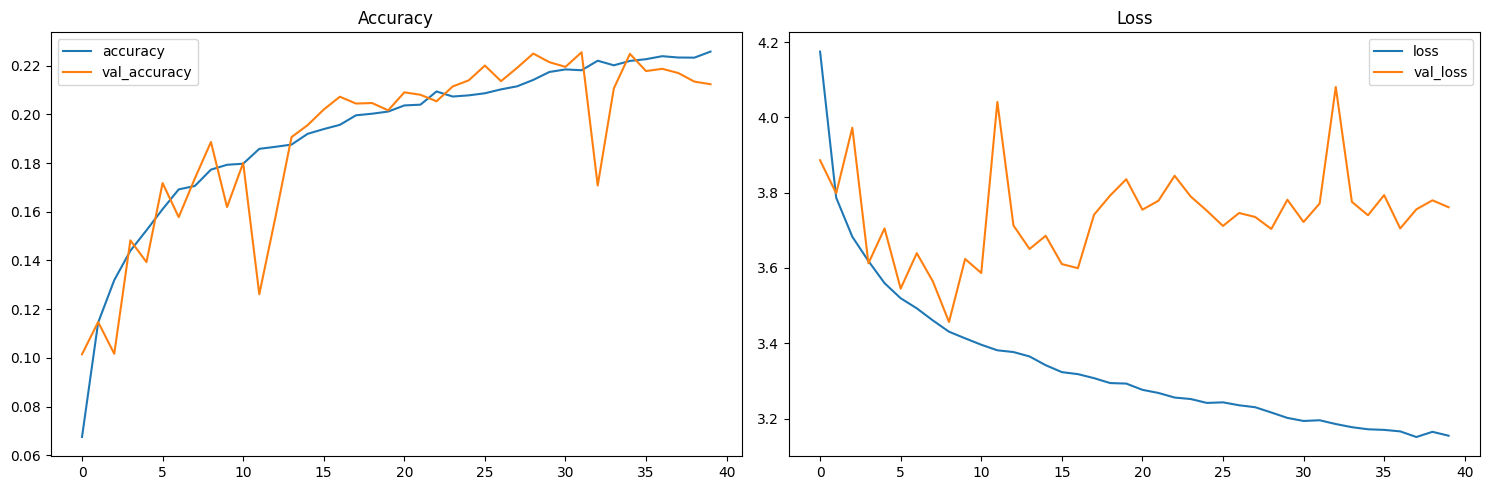

In [39]:
# plot accuracy and loss plot side by side using subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(ann_metric_df["epochs"], ann_metric_df["accuracy"], label="accuracy")
axs[0].plot(ann_metric_df["epochs"], ann_metric_df["val_accuracy"], label="val_accuracy")
axs[0].set_title("Accuracy")
axs[0].legend()
axs[1].plot(ann_metric_df["epochs"], ann_metric_df["loss"], label="loss")
axs[1].plot(ann_metric_df["epochs"], ann_metric_df["val_loss"], label="val_loss")
axs[1].set_title("Loss")
axs[1].legend()
plt.tight_layout()
plt.show()